In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.abspath(os.path.dirname("__file__")), '..'))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from utils import data_handling, exploratory_data_analysis
from ipywidgets import interact

### Setup visualization settings

In [2]:
plt.style.use('seaborn-paper')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['legend.handlelength'] = 2.0
minor_locator = AutoMinorLocator(4)

### Load and group data according to labels and types

In [3]:
categories = ['mono-functional', 'mono-marginally-defective', 'mono-defective', 
    'poly-functional','poly-marginally-defective', 'poly-defective']
    
cell_images, cell_labels, cell_types = data_handling.load_data_from_file('../data/labels.csv')

mono_functional = data_handling.query_data_by_labels_and_types(cell_images, cell_labels, cell_types, 0.0, 'mono')
mono_defective = data_handling.query_data_by_labels_and_types(cell_images, cell_labels, cell_types, 1.0, 'mono')
mono_marginally_defective = np.concatenate(\
    (data_handling.query_data_by_labels_and_types(cell_images, cell_labels, cell_types, 0.3333333333333333, 'mono'), 
    data_handling.query_data_by_labels_and_types(cell_images, cell_labels, cell_types, 0.6666666666666666, 'mono')), axis = 0)

poly_functional = data_handling.query_data_by_labels_and_types(cell_images, cell_labels, cell_types, 0.0, 'poly')
poly_defective = data_handling.query_data_by_labels_and_types(cell_images, cell_labels, cell_types, 1.0, 'poly')
poly_marginally_defective = np.concatenate(\
    (data_handling.query_data_by_labels_and_types(cell_images, cell_labels, cell_types, 0.3333333333333333, 'poly'), 
    data_handling.query_data_by_labels_and_types(cell_images, cell_labels, cell_types, 0.6666666666666666, 'poly')), axis = 0)

print([mono_functional.shape, mono_marginally_defective.shape, mono_defective.shape])
print([poly_functional.shape, poly_marginally_defective.shape, poly_defective.shape])

[(588, 300, 300), (173, 300, 300), (313, 300, 300)]
[(920, 300, 300), (228, 300, 300), (402, 300, 300)]


In [4]:
@interact(i = (0, mono_functional.shape[0] - 1), 
    j = (0, mono_marginally_defective.shape[0] - 1), 
    k = (0, mono_defective.shape[0] - 1))
def display_image(i = 0, j = 0, k = 0):
    fig, axs = plt.subplots(1,3)
    axs[0].imshow(mono_functional[i], cmap = 'gray')
    axs[0].set_title(categories[0])
    axs[0].set_xlabel('Width [px]')
    axs[0].set_ylabel('Width [px]')

    axs[1].imshow(mono_marginally_defective[j], cmap = 'gray')
    axs[1].set_title(categories[1])
    axs[1].set_xlabel('Width [px]')
    axs[1].set_ylabel('Width [px]')

    axs[2].imshow(mono_defective[k], cmap = 'gray')
    axs[2].set_title(categories[2])
    axs[2].set_xlabel('Width [px]')
    axs[2].set_ylabel('Width [px]')
    plt.tight_layout()
    return None

@interact(i = (0, poly_functional.shape[0] - 1), 
    j = (0, poly_marginally_defective.shape[0] - 1), 
    k = (0, poly_defective.shape[0] - 1))
def display_image(i = 0, j = 0, k = 0):
    fig, axs = plt.subplots(1,3)
    axs[0].imshow(poly_functional[i], cmap = 'gray')
    axs[0].set_title(categories[3])
    axs[0].set_xlabel('Width [px]')
    axs[0].set_ylabel('Width [px]')

    axs[1].imshow(poly_marginally_defective[j], cmap = 'gray')
    axs[1].set_title(categories[4])
    axs[1].set_xlabel('Width [px]')
    axs[1].set_ylabel('Width [px]')

    axs[2].imshow(poly_defective[k], cmap = 'gray')
    axs[2].set_title(categories[5])
    axs[2].set_xlabel('Width [px]')
    axs[2].set_ylabel('Width [px]')
    plt.tight_layout()
    return None

interactive(children=(IntSlider(value=0, description='i', max=587), IntSlider(value=0, description='j', max=17…

interactive(children=(IntSlider(value=0, description='i', max=919), IntSlider(value=0, description='j', max=22…

In [5]:
##
# Compute statistical parameters (mean, median, std, max, min, mode):
#
mono_functional_stats = exploratory_data_analysis.compute_statistical_parameters(mono_functional)
mono_marginally_defective_stats = exploratory_data_analysis.compute_statistical_parameters(mono_marginally_defective)
mono_defective_stats = exploratory_data_analysis.compute_statistical_parameters(mono_defective)

poly_functional_stats = exploratory_data_analysis.compute_statistical_parameters(poly_functional)
poly_marginally_defective_stats = exploratory_data_analysis.compute_statistical_parameters(poly_marginally_defective)
poly_defective_stats = exploratory_data_analysis.compute_statistical_parameters(poly_defective)

parameters = [mono_functional_stats, mono_marginally_defective_stats, mono_defective_stats,
    poly_functional_stats, poly_marginally_defective_stats, poly_defective_stats]

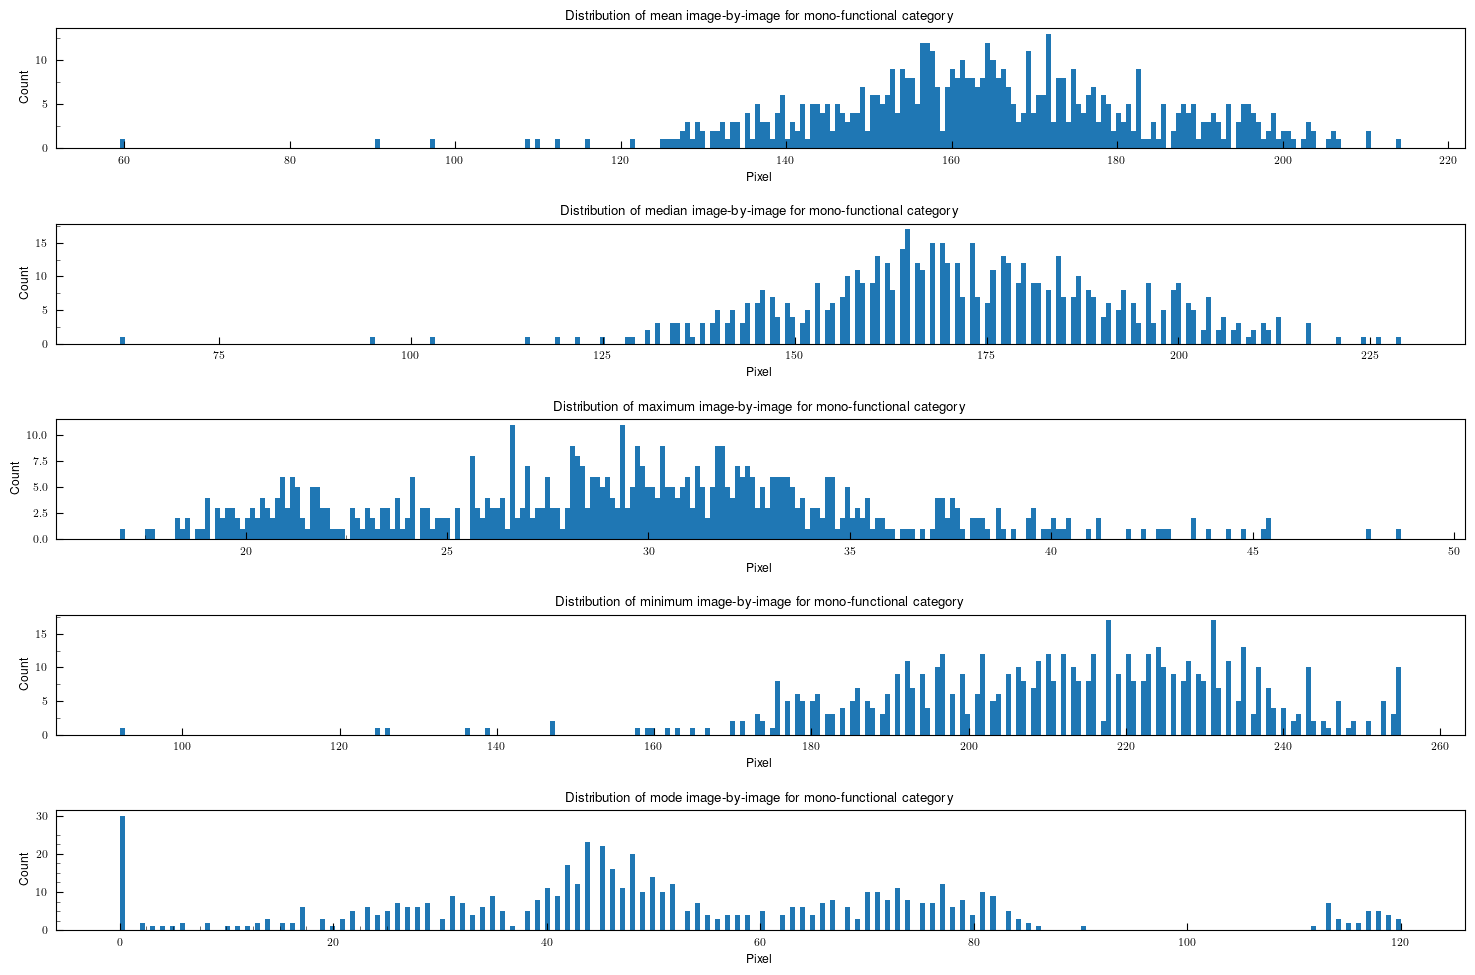

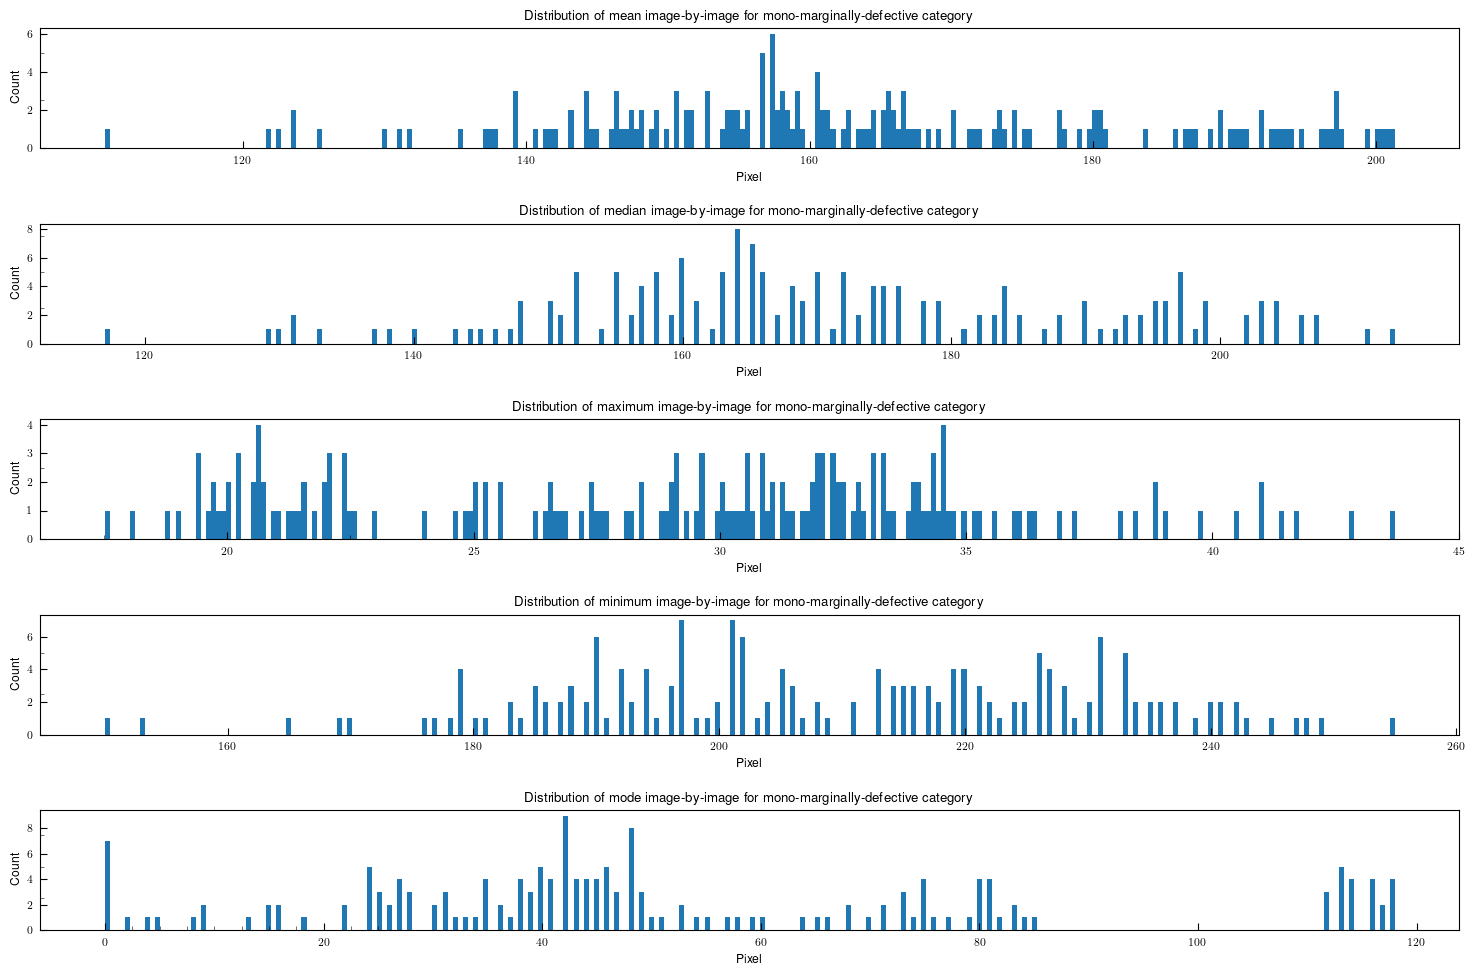

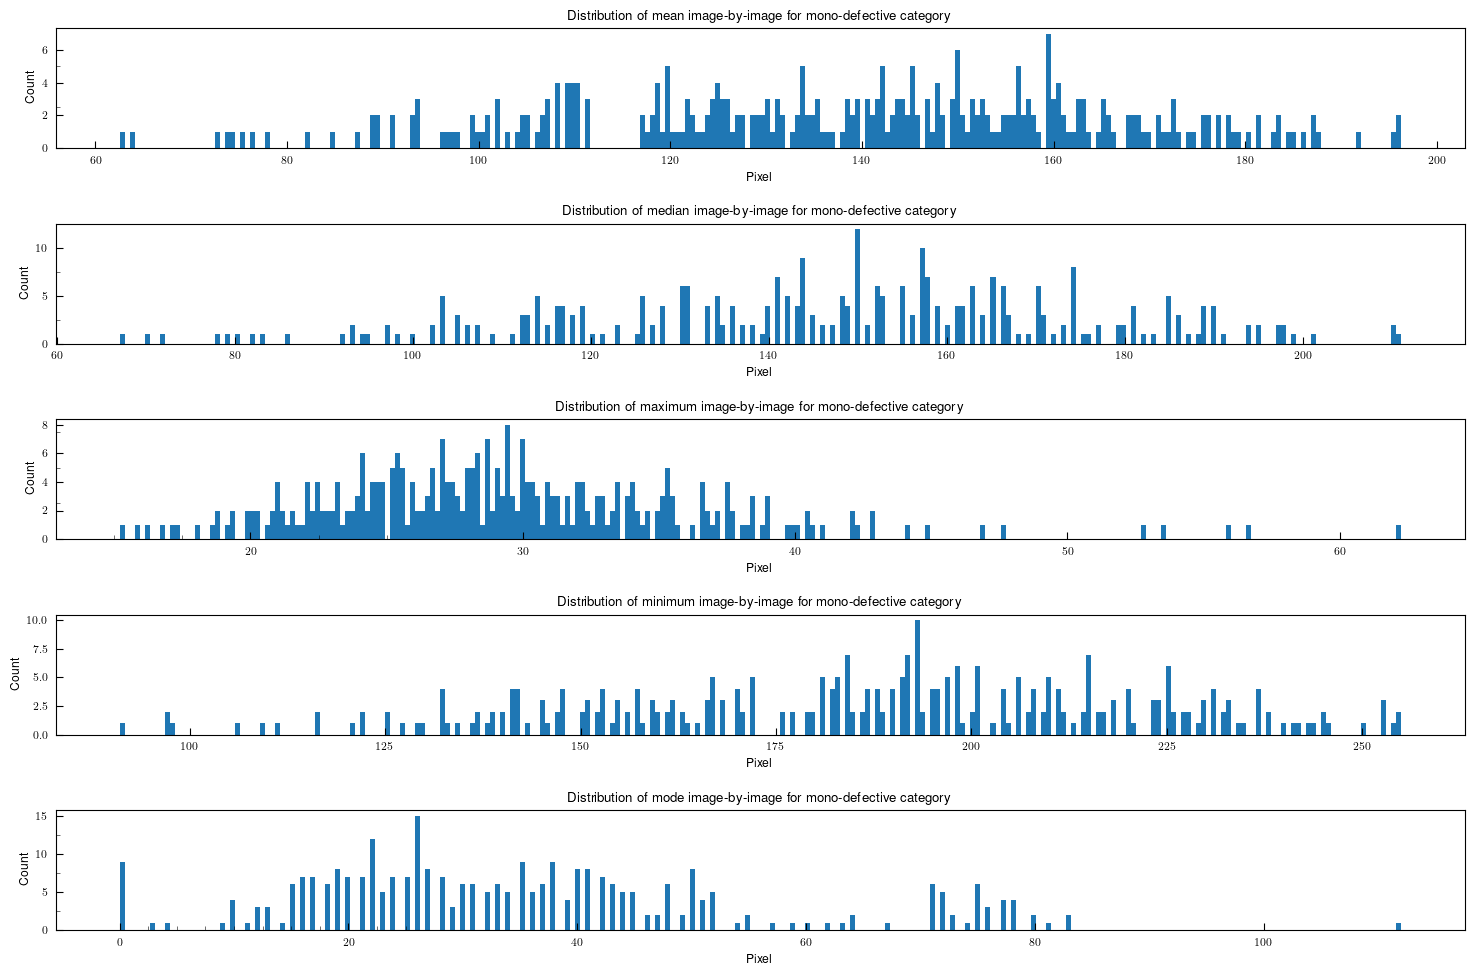

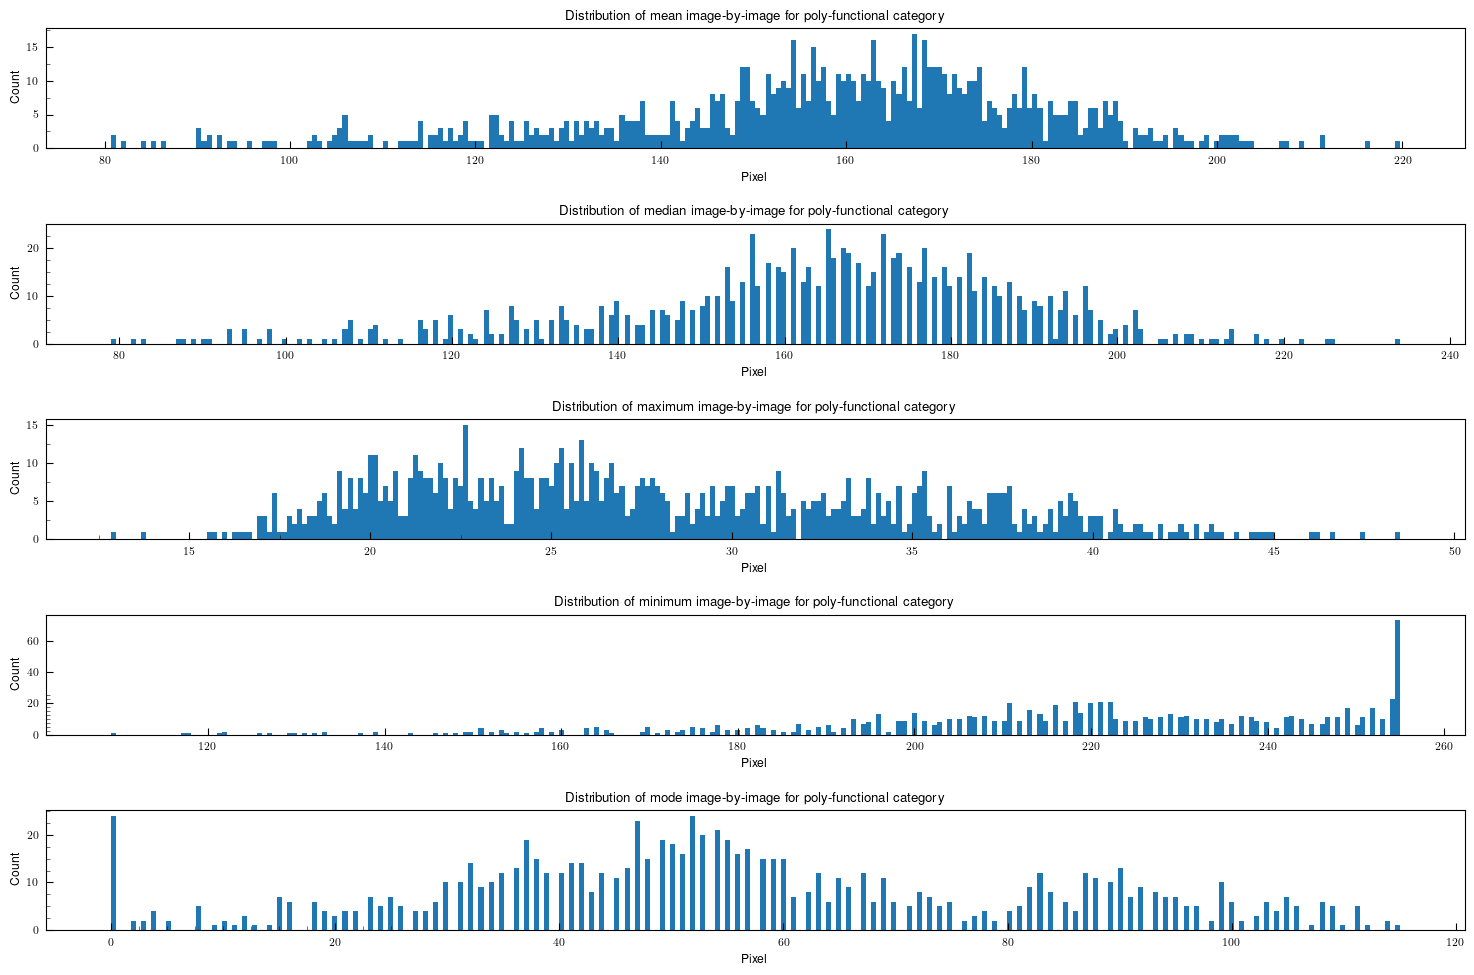

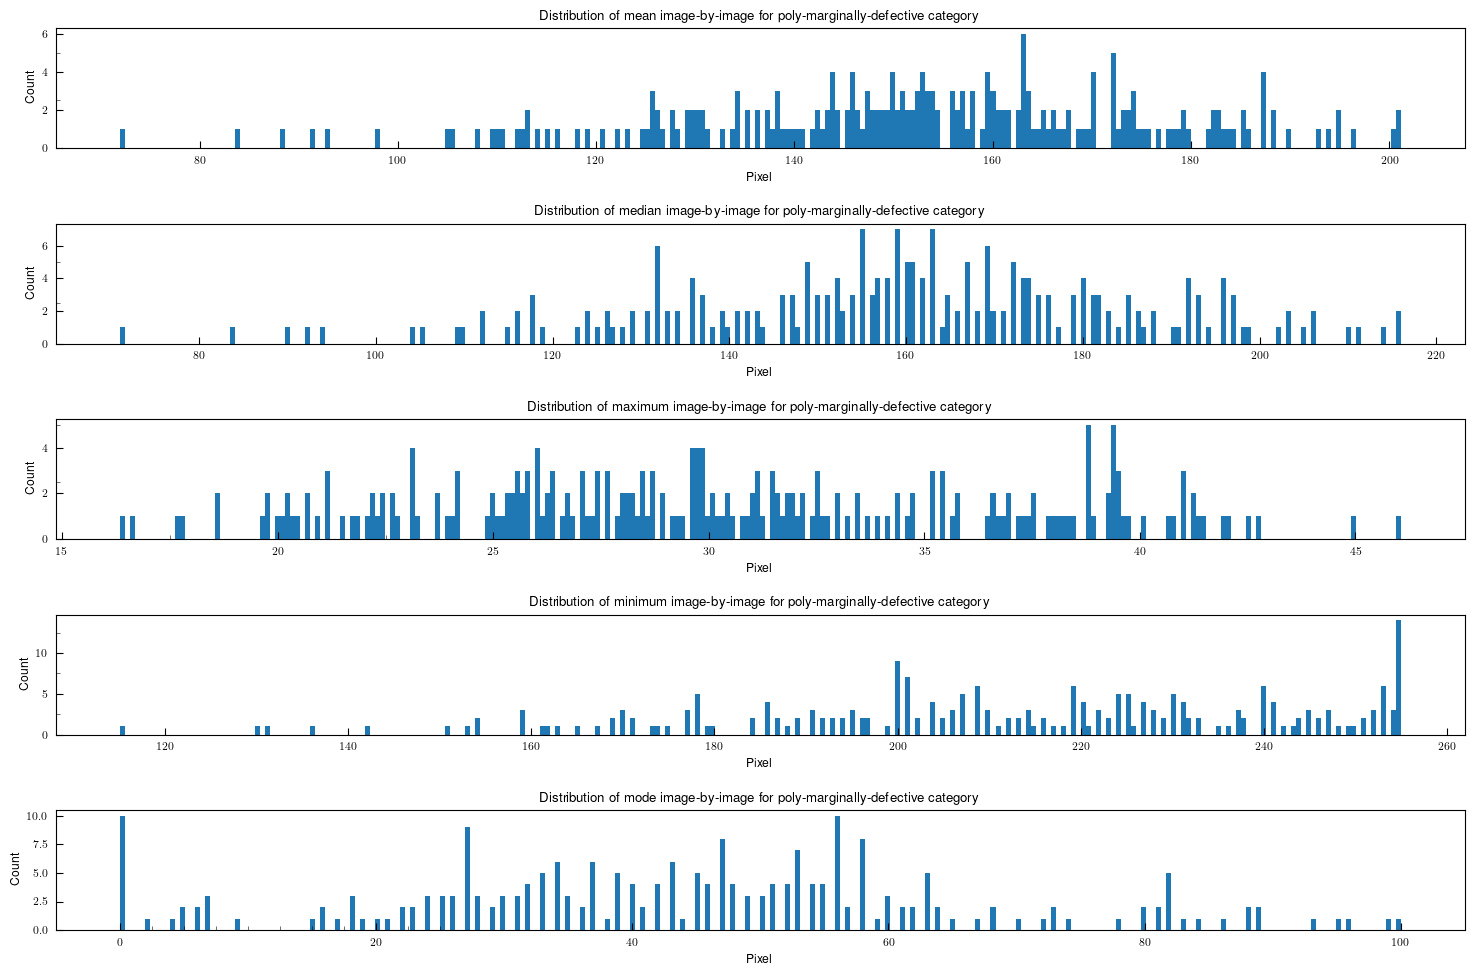

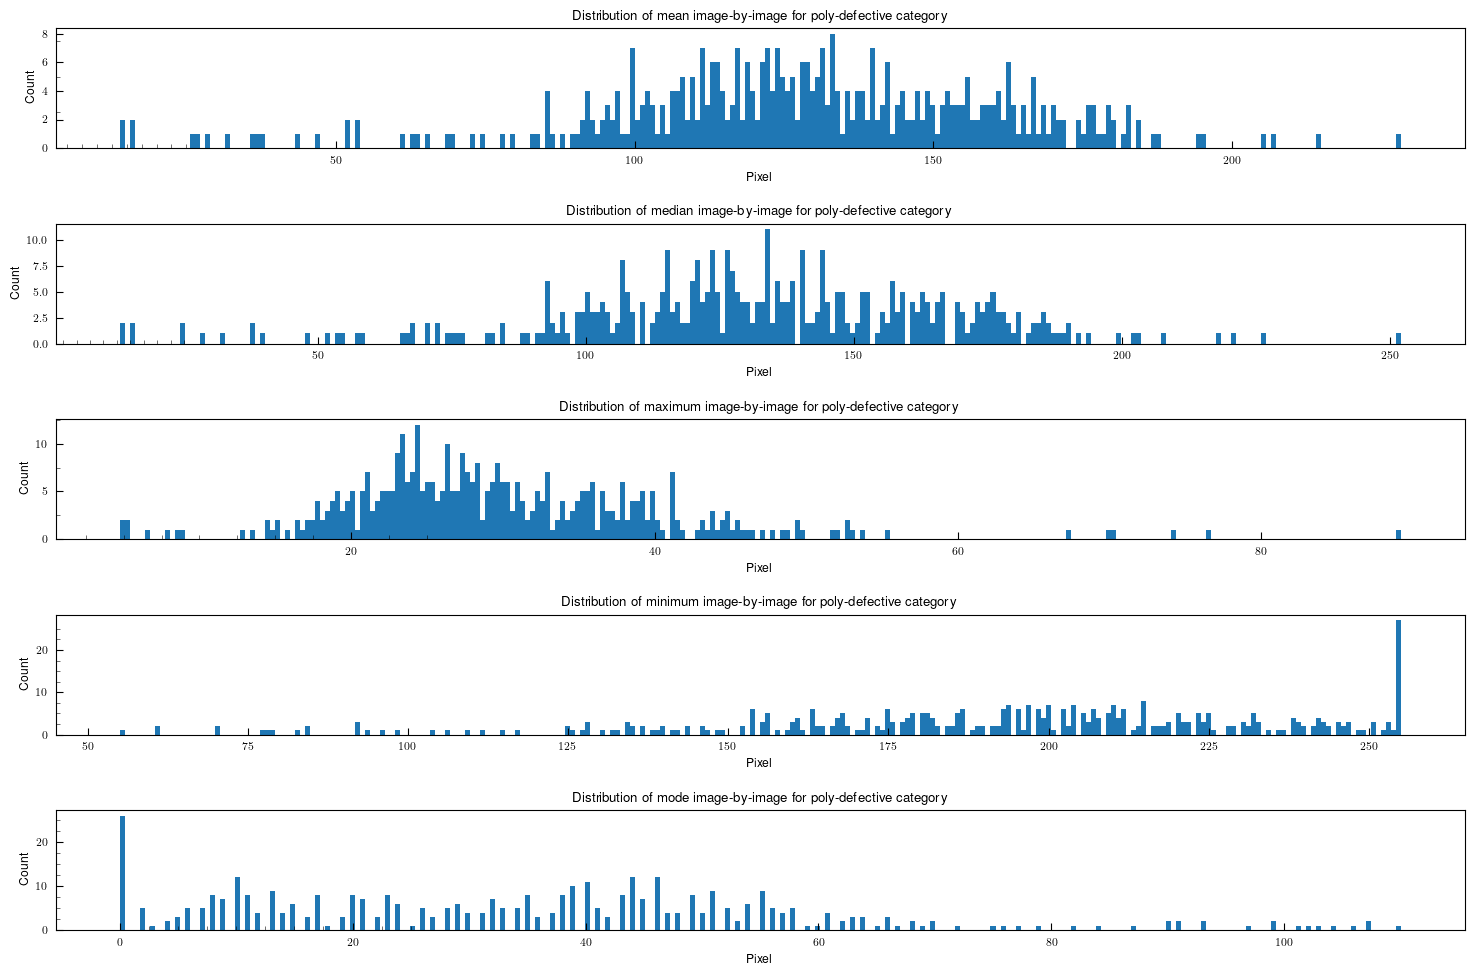

In [6]:
##
# Visualize the distribution of these statistical parameters:
#
titles = ['mean', 'median', 'maximum', 'minimum', 'mode']

for idx, category in enumerate(categories):
    fig, axs = plt.subplots(5, 1, figsize = (15,10))
    for jdx in range(5):
        axs[jdx].hist(parameters[idx][jdx], bins = 256)
        axs[jdx].set_title(f'Distribution of {titles[jdx]} image-by-image for {category} category')
        axs[jdx].set_xlabel('Pixel')
        axs[jdx].set_ylabel('Count')
        axs[jdx].xaxis.set_minor_locator(minor_locator)
        axs[jdx].yaxis.set_minor_locator(minor_locator)
        plt.tight_layout()


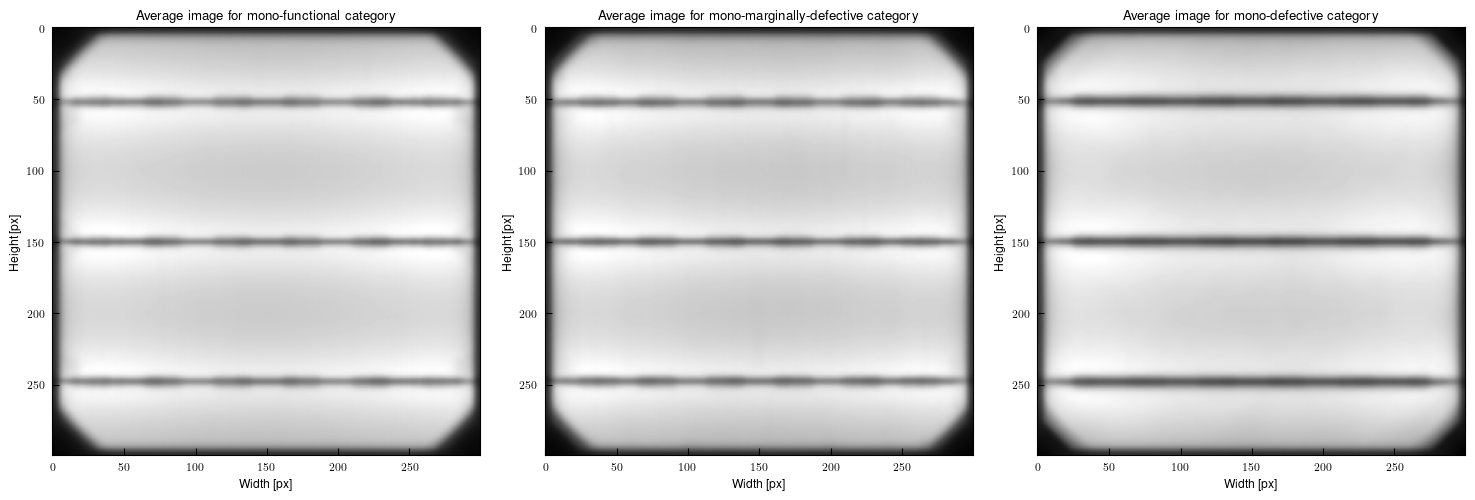

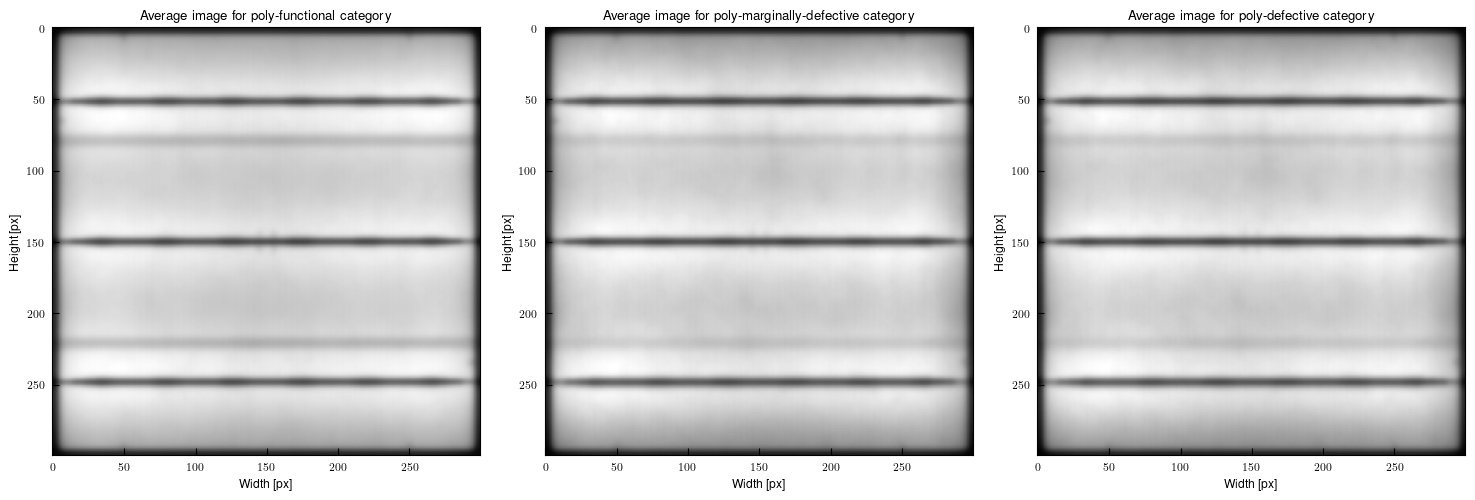

In [7]:
##
# Computer and visualize average image:
#
mono_functional_average = exploratory_data_analysis.compute_average_image(mono_functional)
mono_marginally_defective_average = exploratory_data_analysis.compute_average_image(mono_marginally_defective)
mono_defective_average = exploratory_data_analysis.compute_average_image(mono_defective)

poly_functional_average = exploratory_data_analysis.compute_average_image(poly_functional)
poly_marginally_defective_average = exploratory_data_analysis.compute_average_image(poly_marginally_defective)
poly_defective_average = exploratory_data_analysis.compute_average_image(poly_defective)

average_images = [mono_functional_average, mono_marginally_defective_average, mono_defective_average, 
    poly_functional_average, poly_marginally_defective_average, poly_marginally_defective_average]

fig, axs = plt.subplots(1, 3, figsize = (15,10))
for jdx in range(3):
    axs[jdx].imshow(average_images[jdx], cmap = 'gray')
    axs[jdx].set_title(f'Average image for {categories[jdx]} category')
    axs[jdx].set_xlabel('Width [px]')
    axs[jdx].set_ylabel('Height [px]')
    plt.tight_layout()

fig, axs = plt.subplots(1, 3, figsize = (15,10))
for jdx in range(3):
    axs[jdx].imshow(average_images[jdx + 3], cmap = 'gray')
    axs[jdx].set_title(f'Average image for {categories[jdx + 3]} category')
    axs[jdx].set_xlabel('Width [px]')
    axs[jdx].set_ylabel('Height [px]')
    plt.tight_layout()

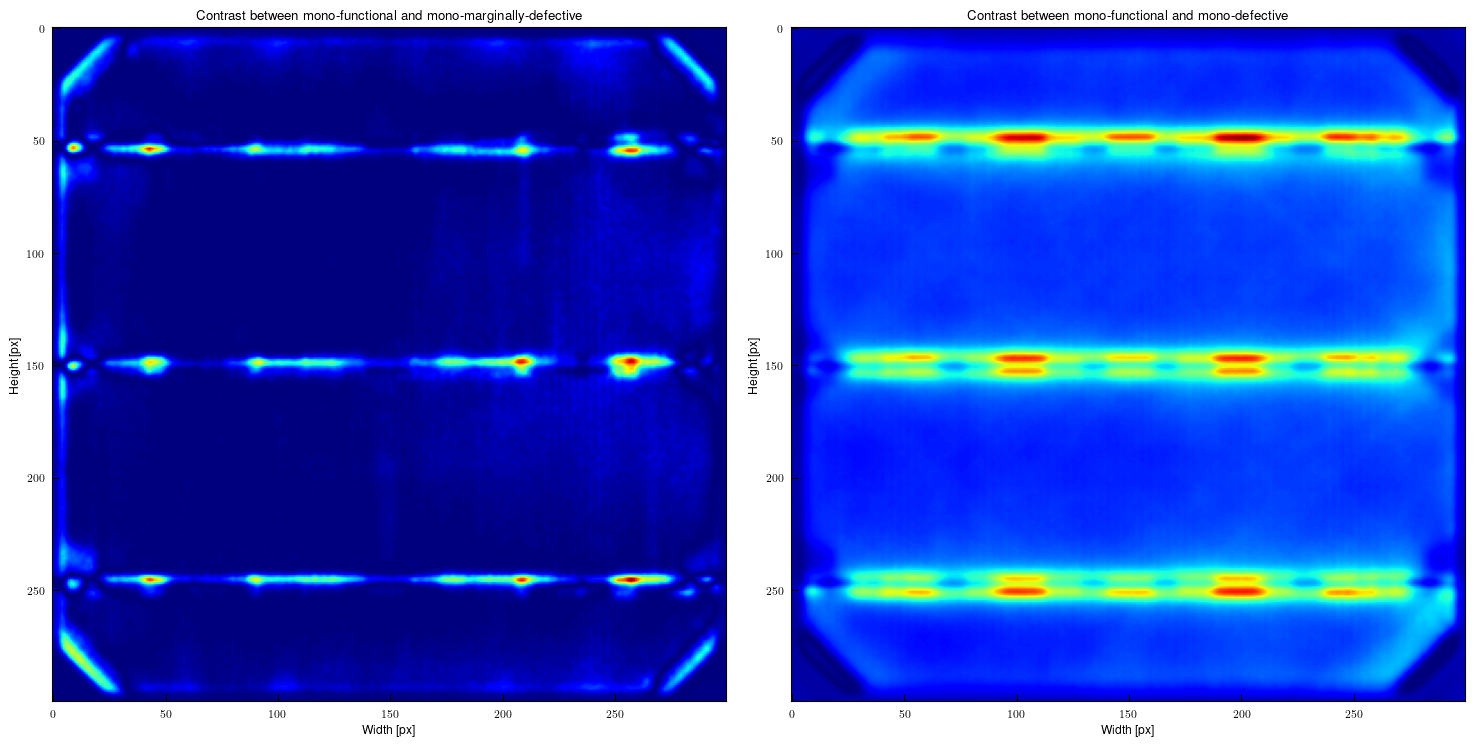

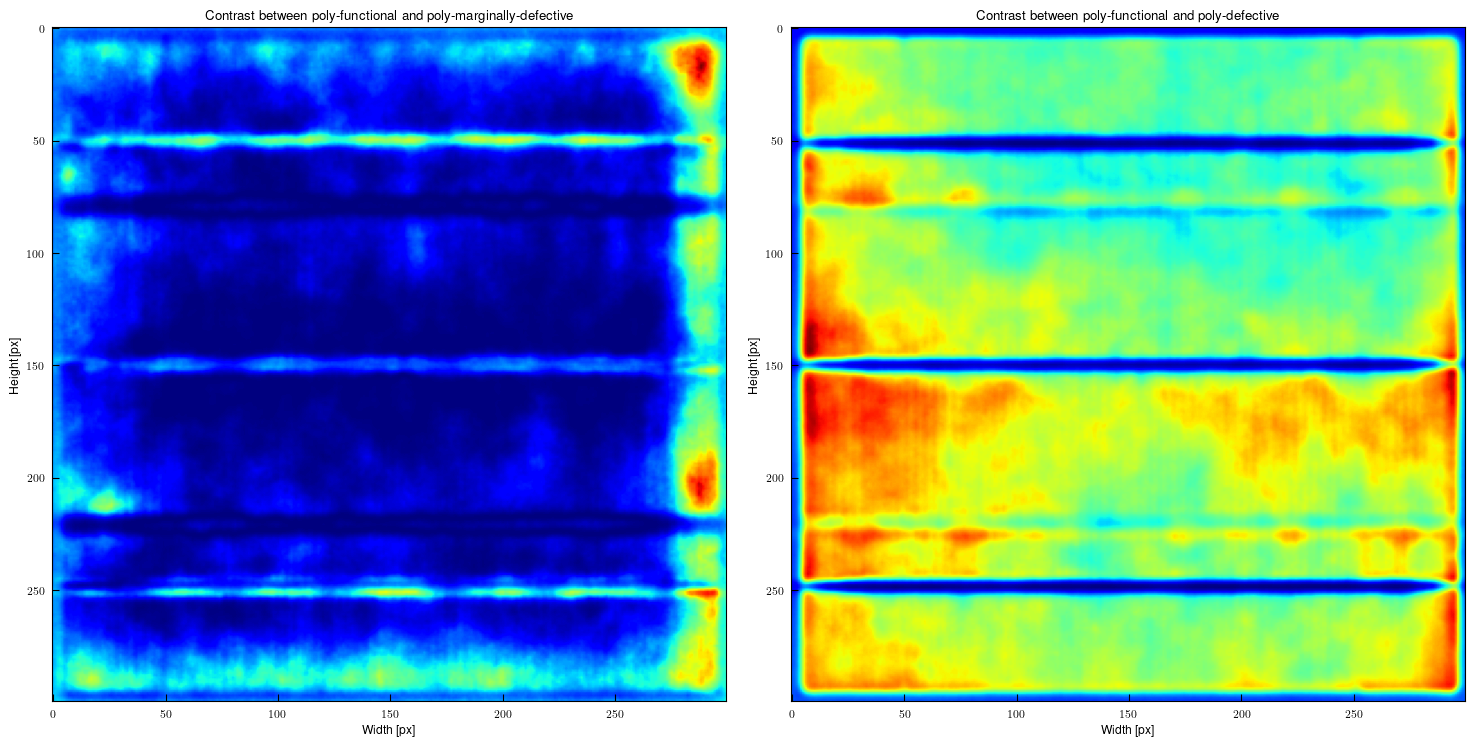

In [8]:
##
# Computer and visualize image contrast:
#
mono_contrast = [np.subtract(mono_functional_average, mono_marginally_defective_average) ** 2, 
    np.subtract(mono_functional_average, mono_defective_average) ** 2]
poly_contrast = [np.subtract(poly_functional_average, poly_marginally_defective_average) ** 2, 
    np.subtract(poly_functional_average, poly_defective_average) ** 2]

fig, axs = plt.subplots(1, 2, figsize = (15,10))
axs[0].imshow(mono_contrast[0], cmap = 'jet')
axs[0].set_title(f'Contrast between {categories[0]} and {categories[1]}')
axs[0].set_xlabel('Width [px]')
axs[0].set_ylabel('Height [px]')
axs[1].imshow(mono_contrast[1], cmap = 'jet')
axs[1].set_title(f'Contrast between {categories[0]} and {categories[2]}')
axs[1].set_xlabel('Width [px]')
axs[1].set_ylabel('Height [px]')
plt.tight_layout()

fig, axs = plt.subplots(1, 2, figsize = (15,10))
axs[0].imshow(poly_contrast[0], cmap = 'jet')
axs[0].set_title(f'Contrast between {categories[3]} and {categories[4]}')
axs[0].set_xlabel('Width [px]')
axs[0].set_ylabel('Height [px]')
axs[1].imshow(poly_contrast[1], cmap = 'jet')
axs[1].set_title(f'Contrast between {categories[3]} and {categories[5]}')
axs[1].set_xlabel('Width [px]')
axs[1].set_ylabel('Height [px]')
plt.tight_layout()

c:\ProgramData\Anaconda3\envs\tensorflow_latest\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\tensorflow_latest\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


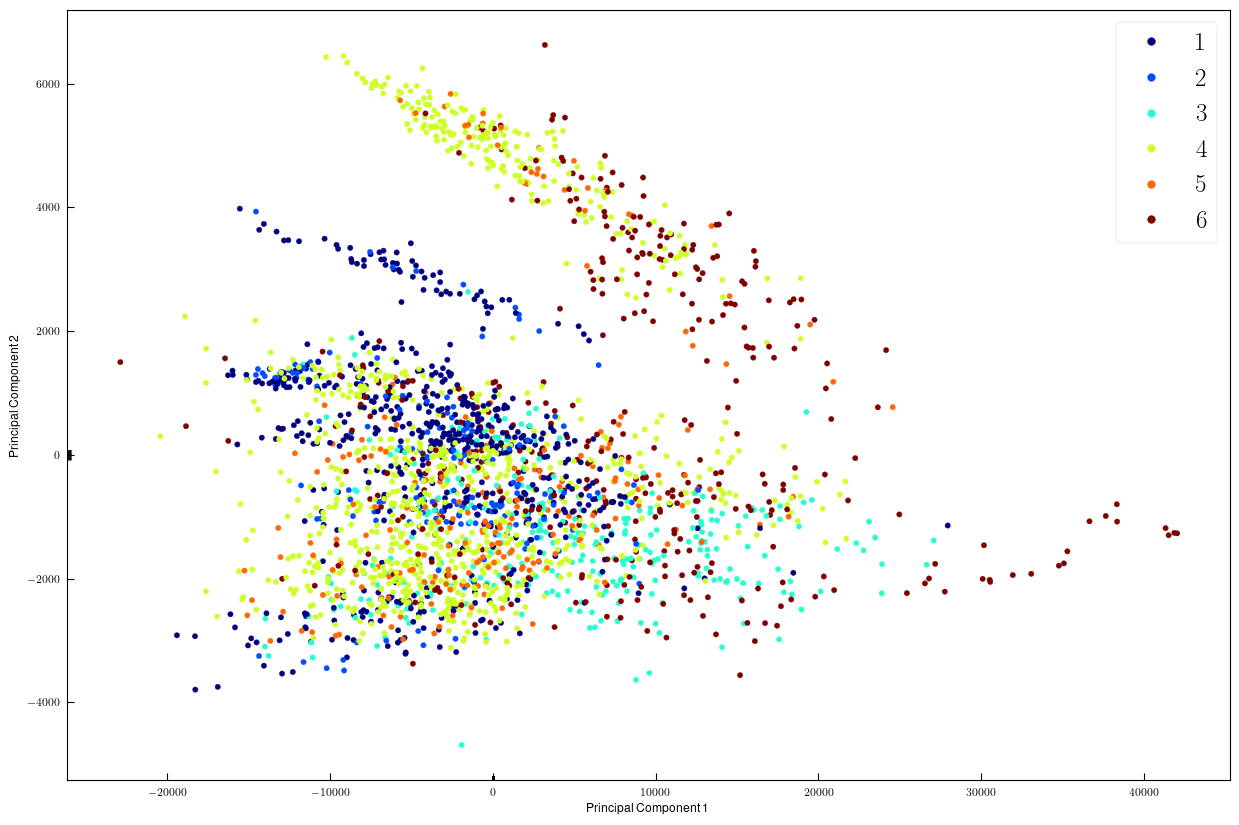

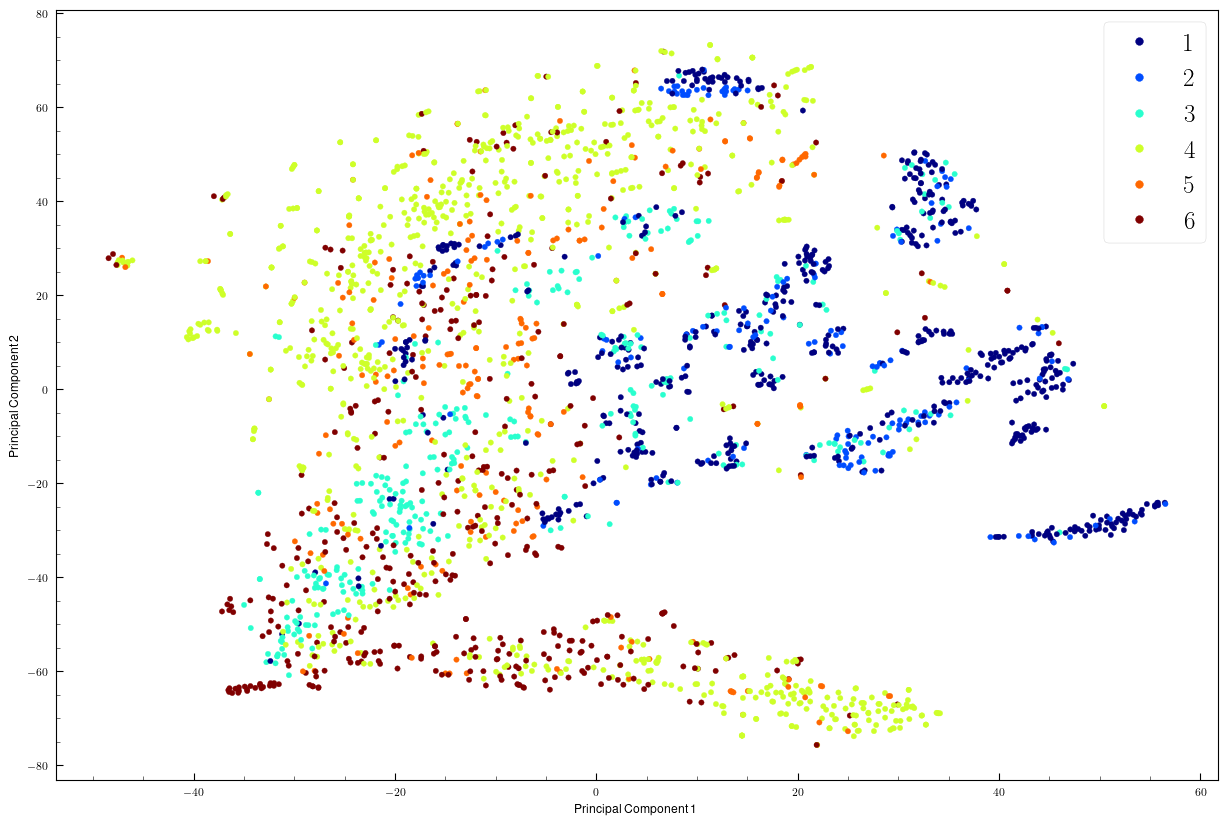

In [9]:
##
# Compute and visualize embeddings using PCA and t-SNE:
#
cell_images_embeddings, cell_classes = \
    exploratory_data_analysis.compute_image_embeddings_PCA(cell_images, cell_labels, cell_types, 2)

fig, axs = plt.subplots(1, 1, figsize = (15, 10))
scatter = axs.scatter(cell_images_embeddings[:, 0], cell_images_embeddings[:, 1], s = 15, 
    cmap = plt.cm.get_cmap('jet', 6), c = cell_classes)
axs.set_xlabel('Principal Component 1')
axs.set_ylabel('Principal Component 2')
axs.xaxis.set_minor_locator(minor_locator)
axs.yaxis.set_minor_locator(minor_locator)
handles, labels = scatter.legend_elements()
legends = axs.legend(handles, labels, )
axs.add_artist(legends)

cell_images_embeddings, cell_classes = \
    exploratory_data_analysis.compute_image_embeddings_tSNE(cell_images, cell_labels, cell_types)

fig, axs = plt.subplots(1, 1, figsize = (15, 10))
scatter = axs.scatter(cell_images_embeddings[:, 0], cell_images_embeddings[:, 1], s = 15, 
    cmap = plt.cm.get_cmap('jet', 6), c = cell_classes)
axs.set_xlabel('Principal Component 1')
axs.set_ylabel('Principal Component 2')
axs.xaxis.set_minor_locator(minor_locator)
axs.yaxis.set_minor_locator(minor_locator)
handles, labels = scatter.legend_elements()
legends = axs.legend(handles, labels, )
axs.add_artist(legends)